In [1]:
import os 
import requests 
import scipy.io as sio
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from rbm import RBM
from dnn import DNN
from utils_projet import lire_alpha_digit, sigmoid
from principal_RBM_alpha import init_RBM, entree_sortie_RBM,\
                                sortie_entree_RBM, train_RBM
from principal_DNN_alpha import init_DNN, pretrain_DNN, generer_image_DBN

File already downloaded, using version in data folder..
Epoch: 0 -- Erreur de reconstruction: 0.32411858974358976
Epoch: 1 -- Erreur de reconstruction: 0.29102564102564105
Epoch: 2 -- Erreur de reconstruction: 0.27095352564102565
Epoch: 3 -- Erreur de reconstruction: 0.24863782051282052
Epoch: 4 -- Erreur de reconstruction: 0.23405448717948718
Epoch: 5 -- Erreur de reconstruction: 0.21582532051282052
Epoch: 6 -- Erreur de reconstruction: 0.19763621794871794
Epoch: 7 -- Erreur de reconstruction: 0.19278846153846155
Epoch: 8 -- Erreur de reconstruction: 0.1735176282051282
Epoch: 9 -- Erreur de reconstruction: 0.16442307692307692
Epoch: 10 -- Erreur de reconstruction: 0.15600961538461539
Epoch: 11 -- Erreur de reconstruction: 0.15256410256410258
Epoch: 12 -- Erreur de reconstruction: 0.1465544871794872
Epoch: 13 -- Erreur de reconstruction: 0.1408253205128205
Epoch: 14 -- Erreur de reconstruction: 0.13305288461538461
Epoch: 15 -- Erreur de reconstruction: 0.1312900641025641
Epoch: 16 -- E

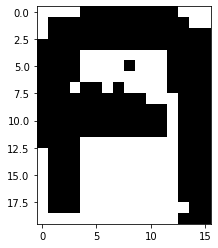

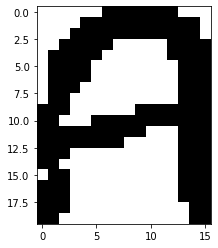

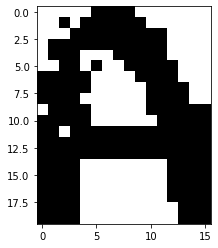

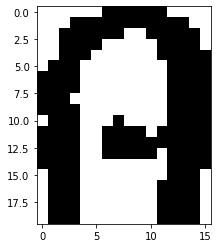

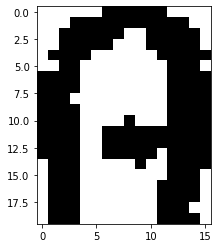

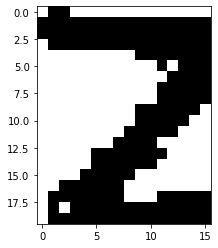

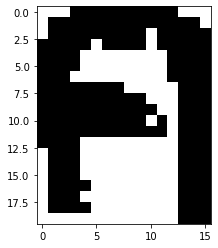

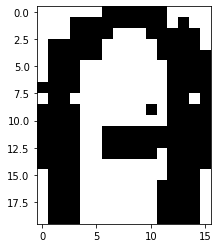

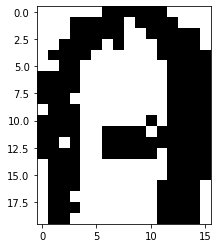

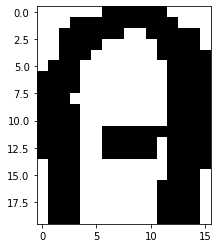

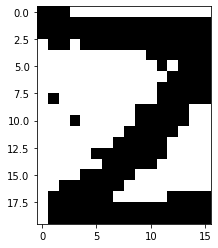

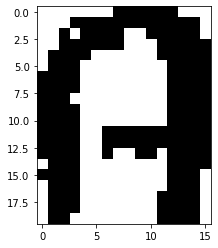

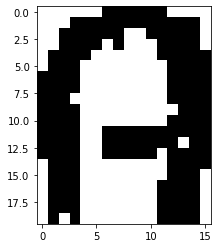

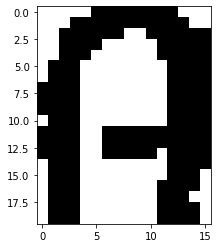

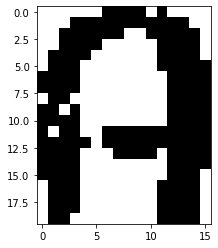

In [3]:
# Récuperons les données
digits_list = ['A', 'Z']
# digits_list = ['A']
# X a pour format (n, p). n = 39*nbr_digits pour alphadigits et 20*16 pixels par image
X = lire_alpha_digit(digits_list)
# Numéro de pixels de l'image
p = X.shape[1]
# numero de classes
# Initializer le RBM 
# hidden_layer_size = [100, 100]
# Source: https://www.ki.tu-berlin.de/fileadmin/fg135/publikationen/Hebbo_2013_CDB.pdf
#hidden_layer_size = [1000, 1000, 2000]
hidden_layer_size = [500, 500, 2000]
nbr_classes = len(digits_list)
dnn = init_DNN(p, hidden_layer_size, nbr_classes)
# train 
dnn = pretrain_DNN(dnn, X, epochs=100, learning_rate=0.1, batch_size=10)

#trained_rbm = pretrain_DNN(rbm_unit, X, epochs=50, learning_rate=0.1, batch_size=3, cd_k=1)
# Reconstruisons les images 
generer_image_DBN(dnn, nbr_iterations_gibbs=1000, nbr_images=15, image_shape=(20, 16))

In [12]:
dnn.DBN[-1].q

1